iloc 位置索引

In [2]:
import pandas as pd
import numpy as np

# Series
ser_obj = pd.Series(range(5), index = list("abcde"))

print(ser_obj)
print(ser_obj[1:3])
print(ser_obj.iloc[1:3])

# DataFrame，iloc是前闭后开[)
df_obj = pd.DataFrame(np.random.randn(5,4),
                      columns = ['a', 'b', 'c', 'd'])

print(df_obj.head())
print(df_obj.iloc[0:2, 0:2])  # 注意和df_obj.loc[0:2, 'a']的区别
print(df_obj.loc[0:2, 'a'])  # 标签索引，左闭右闭

a    0
b    1
c    2
d    3
e    4
dtype: int64
b    1
c    2
dtype: int64
b    1
c    2
dtype: int64
          a         b         c         d
0  0.018859 -0.788228 -0.689737 -0.922511
1  1.610657 -0.460582  0.122773 -0.050402
2 -0.370981 -0.874511 -0.531778 -0.452041
3 -0.668667  0.603082 -1.673374  1.508904
4 -0.533033  1.340183 -0.529001  0.740509
          a         b
0  0.018859 -0.788228
1  1.610657 -0.460582
0    0.018859
1    1.610657
2   -0.370981
Name: a, dtype: float64


# 5 对齐运算

In [3]:
import pandas as pd
s1 = pd.Series(range(10, 20), index = range(10))
s2 = pd.Series(range(20, 25), index = range(5))
print(s1)
print(s2)

# Series 对齐运算
print('s1+s2: ')
s3=s1+s2
print(s3)  #缺失数据默认是NaN  np.nan
print(s3[6])
print('-'*50)
print(s1.add(s2, fill_value = 0))  #未对齐的数据将和填充值做运算

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64
0    20
1    21
2    22
3    23
4    24
dtype: int64
s1+s2: 
0    30.0
1    32.0
2    34.0
3    36.0
4    38.0
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
dtype: float64
nan
--------------------------------------------------
0    30.0
1    32.0
2    34.0
3    36.0
4    38.0
5    15.0
6    16.0
7    17.0
8    18.0
9    19.0
dtype: float64


In [4]:
import numpy as np
df1 = pd.DataFrame(np.ones((2,2)), columns = ['a', 'b'])
df2 = pd.DataFrame(np.ones((3,3)), columns = ['a', 'b', 'c'])
print(df1, '\n', df2)
print(df2.dtypes)  # 不同列可以是不同类型的数据
print(df1-df2)
print(df1.sub(df2, fill_value = 2)) #未对齐的数据将和填充值做运算

     a    b
0  1.0  1.0
1  1.0  1.0 
      a    b    c
0  1.0  1.0  1.0
1  1.0  1.0  1.0
2  1.0  1.0  1.0
a    float64
b    float64
c    float64
dtype: object
     a    b   c
0  0.0  0.0 NaN
1  0.0  0.0 NaN
2  NaN  NaN NaN
     a    b    c
0  0.0  0.0  1.0
1  0.0  0.0  1.0
2  1.0  1.0  1.0


# 6 Pandas的函数应用

In [5]:
# Numpy ufunc 函数
df = pd.DataFrame(np.random.randn(5,4) - 1)
print(df)

print(np.abs(df))  # 绝对值函数

          0         1         2         3
0 -1.081921 -0.451637 -2.053907  0.234169
1  0.284656 -0.198898 -0.481255 -2.213442
2 -1.077227 -0.316876 -1.243566 -2.680288
3  1.101565 -1.194258  0.174344 -1.260444
4 -2.636196 -0.229809 -2.166252 -1.727263
          0         1         2         3
0  1.081921  0.451637  2.053907  0.234169
1  0.284656  0.198898  0.481255  2.213442
2  1.077227  0.316876  1.243566  2.680288
3  1.101565  1.194258  0.174344  1.260444
4  2.636196  0.229809  2.166252  1.727263


In [6]:
#apply默认作用在列上
print(df.apply(lambda x : x.max()))

0    1.101565
1   -0.198898
2    0.174344
3    0.234169
dtype: float64


In [1]:
#apply作用在行上
print(df.apply(lambda x : x.max(), axis=1))
print(type(df.apply(lambda x : x.max(), axis=1)))

NameError: name 'df' is not defined

In [ ]:
# 使用applymap应用到每个数据
print(df.applymap(lambda x : '%.2f' % x))
df.dtypes

In [ ]:
type('%.2f' % 1.3456)  # 字符串类型

4 按索引排序

In [ ]:
# Series
print(np.random.randint(5, size=5))
s4 = pd.Series(range(10, 15), index = np.random.randint(5, size=5))
print(s4)

# 索引排序,sort_index返回一个新的排好索引的series
print(s4.sort_index())
print(s4)
# s4.loc[0:3]  loc索引值不唯一时直接报错
print(s4.iloc[0:3])
s4[0:3]  # 默认用的位置索引

In [ ]:
# DataFrame
df4 = pd.DataFrame(np.random.randn(5, 5),
                   index=np.random.randint(5, size=5),  # 行
                   columns=np.random.randint(5, size=5))  # 列
print(df4)
# 轴零是行索引排序
df4_isort = df4.sort_index(axis=0, ascending=False)  # 降序
print(df4_isort)
# 轴1是列索引排序
df4_isort = df4.sort_index(axis=1, ascending=False)
print(df4_isort)

5 按值排序

In [ ]:
# 按值排序,by后是column的值
import random
l=[random.randint(0,100) for i in range(24)]
df4 = pd.DataFrame(np.array(l).reshape(6,4))
print(df4.values)
print('-'*50)
print(df4)
print('-'*50)

# 按轴零排序，by后是列名
df4_vsort = df4.sort_values(by=3,axis=0, ascending=False) # 寻找的是columns里的3
print(df4_vsort)

# 按轴1排序，by后行索引名
df4_vsort = df4.sort_values(by=3,axis=1, ascending=False) # 寻找的是index里的3
print(df4_vsort)

# 6 处理缺失数据

In [ ]:
df_data = pd.DataFrame([np.random.randn(3), [1., 2., np.nan],
                        [np.nan, 4., np.nan], [1., 2., 3.]])
print(df_data.head())

In [ ]:
print(df_data.isnull())

In [ ]:
print(df_data.dropna())

In [ ]:
print(df_data.dropna(axis=1))  # 某列有nan就删除该列
# 基本没什么用的操作，因为是删除掉了某一特征，很鸡肋

In [ ]:
#给零列的空值填为-100
print(df_data.iloc[:,0].fillna(-100.))

In [ ]:
for i in df_data.columns:
    print(i)

# 7 层级索引（hierarchical indexing）

In [7]:
import pandas as pd
import numpy as np

# MultiIndex是层级索引，索引类型的一种
index1 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd'],
                [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]], names=['cloth', 'size'])

ser_obj = pd.Series(np.random.randn(12),index=index1)
print(ser_obj)
print(type(ser_obj))
print(type(ser_obj.index))
print(ser_obj.index)
print(ser_obj.index.levels)
ser_obj.index.codes

cloth  size
a      0      -1.474390
       1       0.294327
       2       0.128427
b      0      -0.400708
       1       0.447566
       2       1.691315
c      0       0.220369
       1       0.179914
       2      -0.209602
d      0      -0.150169
       1       1.333205
       2      -0.864269
dtype: float64
<class 'pandas.core.series.Series'>
<class 'pandas.core.indexes.multi.MultiIndex'>
MultiIndex([('a', 0),
            ('a', 1),
            ('a', 2),
            ('b', 0),
            ('b', 1),
            ('b', 2),
            ('c', 0),
            ('c', 1),
            ('c', 2),
            ('d', 0),
            ('d', 1),
            ('d', 2)],
           names=['cloth', 'size'])
[['a', 'b', 'c', 'd'], [0, 1, 2]]


FrozenList([[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [ ]:
# 层级索引如何取数据
print(ser_obj)
print('-'*50)
print(ser_obj['c'])
print('-'*50)
print(ser_obj['a', 2])
print('-'*50)
print(ser_obj[:, 2])

In [9]:
#交换层级
print(ser_obj.swaplevel())
print('-'*50)

ser_obj=ser_obj.swaplevel()
print(ser_obj)
print(ser_obj.sort_index(level=0))  # 层级索引按那个索引级别排序
# 把0索引（最外层索引）变为列索引，默认是改变内层索引（-1）
df_obj=ser_obj.unstack(0)  # unstack可以放索引名，或者索引位置
print(df_obj)


cloth  size
a      0      -1.474390
       1       0.294327
       2       0.128427
b      0      -0.400708
       1       0.447566
       2       1.691315
c      0       0.220369
       1       0.179914
       2      -0.209602
d      0      -0.150169
       1       1.333205
       2      -0.864269
dtype: float64
--------------------------------------------------
cloth  size
a      0      -1.474390
       1       0.294327
       2       0.128427
b      0      -0.400708
       1       0.447566
       2       1.691315
c      0       0.220369
       1       0.179914
       2      -0.209602
d      0      -0.150169
       1       1.333205
       2      -0.864269
dtype: float64
cloth  size
a      0      -1.474390
       1       0.294327
       2       0.128427
b      0      -0.400708
       1       0.447566
       2       1.691315
c      0       0.220369
       1       0.179914
       2      -0.209602
d      0      -0.150169
       1       1.333205
       2      -0.864269
dtype: float64
clot

In [23]:
# 对df进行stack，就会把行，列索引进行堆叠，变为series
df_obj.stack()  # stack变为series和unstack保持一致的

size  cloth
0     a        1.422713
      b       -0.244828
      c        0.540645
      d       -2.025492
1     a       -0.289150
      b       -0.077338
      c        0.706036
      d        0.176507
2     a       -0.286811
      b        0.608255
      c       -1.069390
      d       -1.630801
dtype: float64

# 8 Pandas统计计算和描述

In [24]:
print(df_obj)
df_obj.loc[0,'b']=np.nan  # 标签索引
print(df_obj)
print('-'*50)
print(df_obj.min(axis=0, skipna=True))
print('-'*50)
print(df_obj.describe())  # 观察数据分布的一种方法

cloth         a         b         c         d
size                                         
0      1.422713 -0.244828  0.540645 -2.025492
1     -0.289150 -0.077338  0.706036  0.176507
2     -0.286811  0.608255 -1.069390 -1.630801
cloth         a         b         c         d
size                                         
0      1.422713       NaN  0.540645 -2.025492
1     -0.289150 -0.077338  0.706036  0.176507
2     -0.286811  0.608255 -1.069390 -1.630801
--------------------------------------------------
cloth
a   -0.289150
b   -0.077338
c   -1.069390
d   -2.025492
dtype: float64
--------------------------------------------------
cloth         a         b         c         d
count  3.000000  2.000000  3.000000  3.000000
mean   0.282250  0.265459  0.059097 -1.159929
std    0.987670  0.484788  0.980791  1.174091
min   -0.289150 -0.077338 -1.069390 -2.025492
25%   -0.287981  0.094060 -0.264373 -1.828146
50%   -0.286811  0.265459  0.540645 -1.630801
75%    0.567951  0.436857  0.623341 -0.

In [25]:
df_obj.loc[:,'c']

size
0    0.540645
1    0.706036
2   -1.069390
Name: c, dtype: float64

In [26]:
# 计算最小值或者最大值的索引的位置
print(df_obj.loc[:,'c'].argmin())  # argmin和argmax只能是series，不能是df


2


In [28]:
#返回的是一个series
print(df_obj)
df_obj.idxmin(axis=1)  # 计算最小值或者最大值的索引值

cloth         a         b         c         d
size                                         
0      1.422713       NaN  0.540645 -2.025492
1     -0.289150 -0.077338  0.706036  0.176507
2     -0.286811  0.608255 -1.069390 -1.630801


size
0    d
1    a
2    d
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None
**************************************************
              Rank         Year  Runtime (Minutes)       Rating         Votes  \
count  1

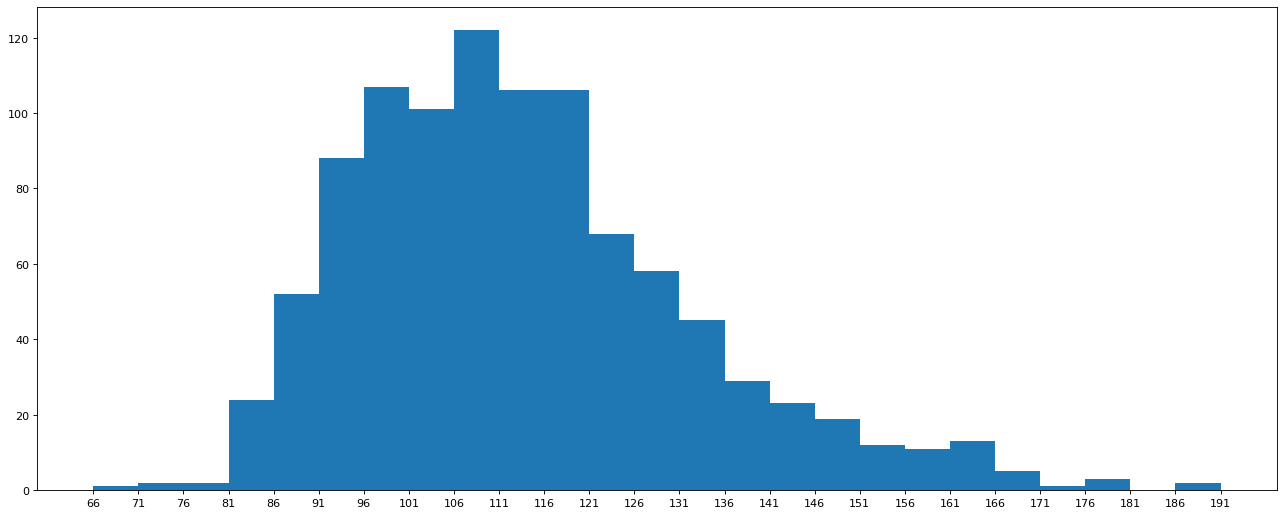

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

file_path = "IMDB-Movie-Data.csv"
df = pd.read_csv(file_path) # 不加路径默认当前路径
# 打印数据信息
print(df.info())
print("*"*50)
print(df.describe())
print(df.head(1))
print('-'*50)

# 导演的人数
print(len(set(df["Director"].tolist())))
print(len(df["Director"].unique()))

# # 获取演员的人数
temp_actors_list = df["Actors"].str.split(", ").tolist()  #二维列表
print(temp_actors_list)
actors_list = [i for j in temp_actors_list for i in j]  #二维展为一维
print(actors_list)
actors_num = len(set(actors_list))
print(actors_num)

# runtime分布情况
# 选择图形，直方图
# 准备数据
runtime_data = df["Runtime (Minutes)"].values

max_runtime = runtime_data.max()
min_runtime = runtime_data.min()

# 计算组数
print(max_runtime - min_runtime)
print('-'*50)
num_bin = (max_runtime - min_runtime) // 5

# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(runtime_data, int(num_bin))

plt.xticks(range(min_runtime, max_runtime + 5, 5))

plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None
   Rank                    Title                    Genre  \
0     1  Guardians of the Galaxy  Action,Adventure,Sci-Fi   

                 

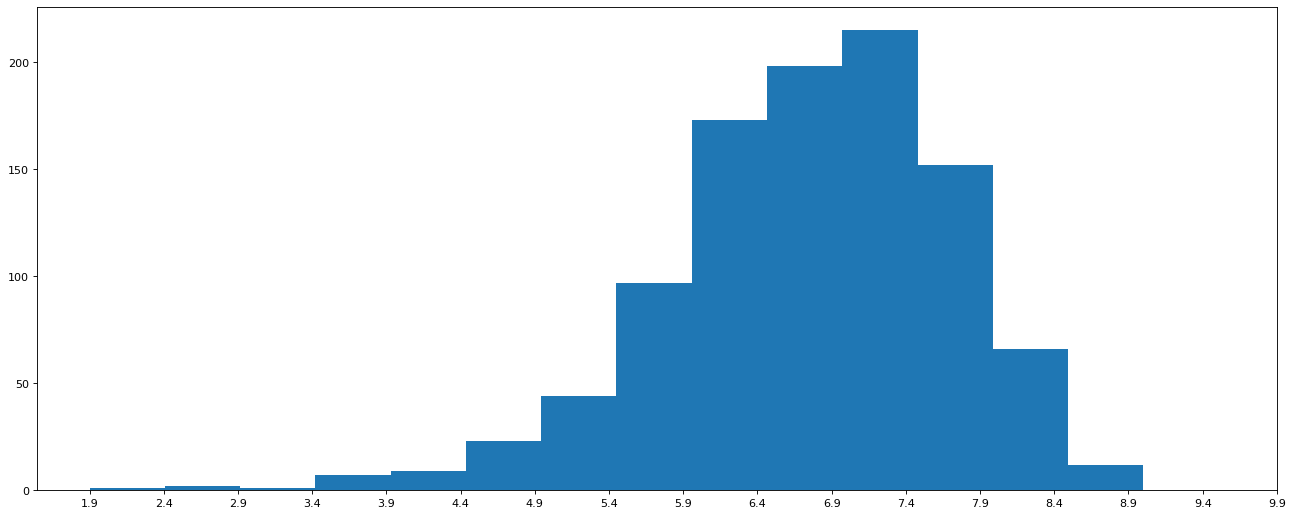

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

file_path = "IMDB-Movie-Data.csv"
df = pd.read_csv(file_path)
# 打印数据信息
print(df.info())

print(df.head(1))

# 获取平均评分
print(df["Rating"].mean())

# 导演的人数
print(len(set(df["Director"].tolist())))
print(len(df["Director"].unique()))

# 获取演员的人数
temp_actors_list = df["Actors"].str.split(", ").tolist()
actors_list = [i for j in temp_actors_list for i in j]
actors_num = len(set(actors_list))
print(actors_num)

# rating分布情况
# 选择图形，直方图
# 准备数据
rating_data = df["Rating"].values

max_rating = rating_data.max()
min_rating = rating_data.min()
print('-'*50)
print(max_rating,min_rating)
# 计算组数
print(max_rating - min_rating)
num_bin = (max_rating - min_rating) // 0.5

# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(rating_data, int(num_bin))

#因为range的步长不支持0.5
_x = [min_rating]
i = min_rating
while i <= max_rating + 0.5:
    i = i + 0.5
    _x.append(i)

plt.xticks(_x)

plt.show()

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
Name: Genre, dtype: object
20
     Horror  Fantasy  Biography  Animation  Romance  History  Family  Music  \
0       0.0      0.0        0.0        0.0      0.0      0.0     0.0    0.0   
1       0.0      0.0        0.0        0.0      0.0      0.0     0.0    0.0   
2       0.0      0.0        0.0        0.0      0.0      0.0     0.0    0.0   
3       0.0      0.0        0.0        0.0      0.0      0.0     0.0    0.0   
4       0.0      0.0        0.0        0.0      0.0      0.0     0.0    0.0   
..      ...      ...        ...        ...      ...      ...     ...    ...   
995     0.0      0.0        0.0        0.0      0.0      0.0     0.0    0.0   
996     0.0      0.0        0.0        0.0      0.0      0.0     0.0    0.0   
997     0.0      0.0        0.0        0.0      0.0      0.0     0.0    0.0   
998     0.0      0.0        0.0        0.0      0.0      0.0     0.0    0.0   
999     0.0

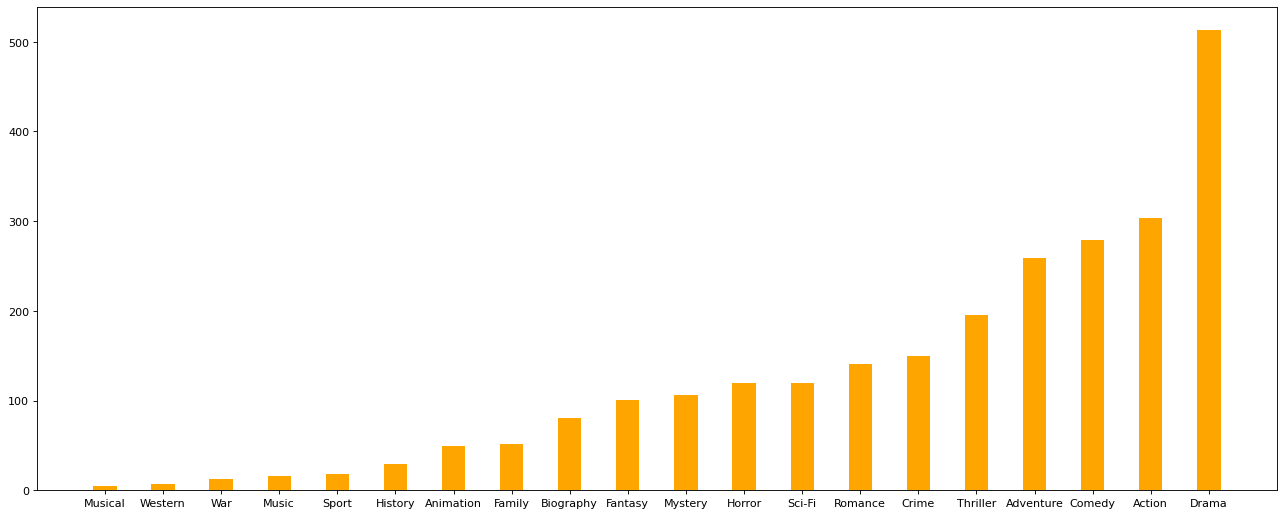

In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
#导演要拍什么题材电影
file_path = "./IMDB-Movie-Data.csv"

df = pd.read_csv(file_path)
print(df["Genre"].head(3))  #看前几条数据，掌握格式，内容类型
# 统计分类的列表
temp_list = df["Genre"].str.split(",").tolist()  # [[],[],[]]
# 二维变为1位
genre_list = list(set([i for j in temp_list for i in j]))
print(len(genre_list))
# 构造全为0的数组，行是原来的样本数，列是题材类型数目，one-hot编码，
zeros_df = pd.DataFrame(np.zeros((df.shape[0], len(genre_list))), columns=genre_list)
print(zeros_df)

# 给每个电影出现分类的位置赋值1
for i in range(df.shape[0]):
    # zeros_df.loc[0,["Sci-fi","Musical"]] = 1
    zeros_df.loc[i, temp_list[i]] = 1

print(zeros_df.head(3))

# 统计每个分类的电影的数量和，genre_count是什么类型？
genre_count = zeros_df.sum(axis=0)
print(genre_count)

# 排序
genre_count = genre_count.sort_values()
_x = genre_count.index
_y = genre_count.values
# 画图
plt.figure(figsize=(20, 8), dpi=80)
plt.bar(range(len(_x)), _y, width=0.4, color="orange")
plt.xticks(range(len(_x)), _x)
plt.show()

# 电影数据-关系分析

1.票房与导演的关系

Director
James Cameron      760.510
Colin Trevorrow    652.180
Joss Whedon        541.135
Lee Unkrich        414.980
Gary Ross          408.000
                    ...   
Todor Chapkanov        NaN
Tyler Shields          NaN
Walter Hill            NaN
Will Slocombe          NaN
William Oldroyd        NaN
Name: Revenue (Millions), Length: 644, dtype: float64


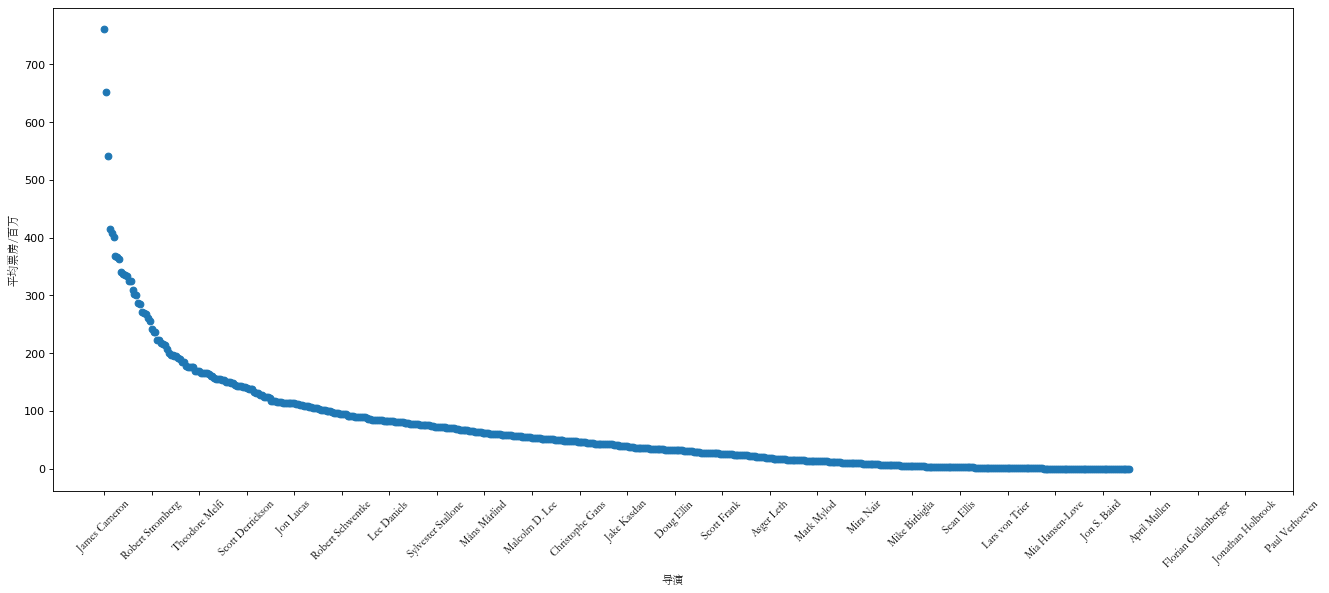

In [5]:
import pandas as pd
from matplotlib import pyplot as plt, font_manager

file_path = "IMDB-Movie-Data.csv"
df = pd.read_csv(file_path)

# 导演的人数
director_num = len(df["Director"].unique())

# 选择图形，散点图
# 准备数据，发现存在导演票房为0，不过用不到，姑且不表
revenue = df["Revenue (Millions)"].groupby(df["Director"]).mean().sort_values(ascending=False)
print(revenue)

_x = revenue.index.tolist()
_y = revenue.values

# 设置图形大小
plt.figure( figsize=(20, 8), dpi=80 )
# 使用scatter绘制散点图
plt.scatter( _x, _y)

my_font = font_manager.FontProperties( fname='C:\Windows\Fonts\STSONG.TTF', size=10 )

_xticks_labels = [i for i in _x]
plt.xticks( _x[::25], _xticks_labels[::25], fontproperties=my_font,rotation=45)

plt.xlabel( '导演', fontproperties=my_font )
plt.ylabel( '平均票房/百万', fontproperties=my_font )

plt.show()

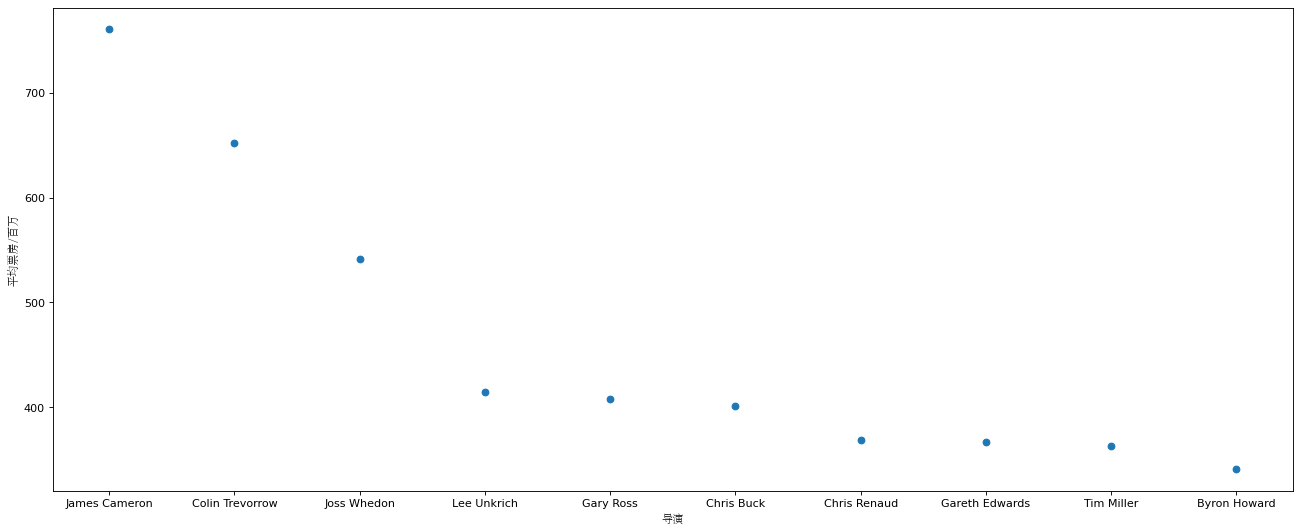

In [6]:
# 仅展示top10数据
plt.figure( figsize=(20, 8), dpi=80 )
plt.scatter(_x[0:10], _y[0:10])
plt.xlabel( '导演', fontproperties=my_font )
plt.ylabel( '平均票房/百万', fontproperties=my_font )

plt.show()

2.票房与演员的关系

[['Chris Pratt', ' Vin Diesel', ' Bradley Cooper', ' Zoe Saldana'], ['Noomi Rapace', ' Logan Marshall-Green', ' Michael Fassbender', ' Charlize Theron'], ['James McAvoy', ' Anya Taylor-Joy', ' Haley Lu Richardson', ' Jessica Sula'], ['Matthew McConaughey', 'Reese Witherspoon', ' Seth MacFarlane', ' Scarlett Johansson'], ['Will Smith', ' Jared Leto', ' Margot Robbie', ' Viola Davis'], ['Matt Damon', ' Tian Jing', ' Willem Dafoe', ' Andy Lau'], ['Ryan Gosling', ' Emma Stone', ' Rosemarie DeWitt', ' J.K. Simmons'], ['Essie Davis', ' Andrea Riseborough', ' Julian Barratt', 'Kenneth Branagh'], ['Charlie Hunnam', ' Robert Pattinson', ' Sienna Miller', ' Tom Holland'], ['Jennifer Lawrence', ' Chris Pratt', ' Michael Sheen', 'Laurence Fishburne'], ['Eddie Redmayne', ' Katherine Waterston', ' Alison Sudol', 'Dan Fogler'], ['Taraji P. Henson', ' Octavia Spencer', ' Janelle Monáe', 'Kevin Costner'], ['Felicity Jones', ' Diego Luna', ' Alan Tudyk', ' Donnie Yen'], ["Auli'i Cravalho", ' Dwayne John

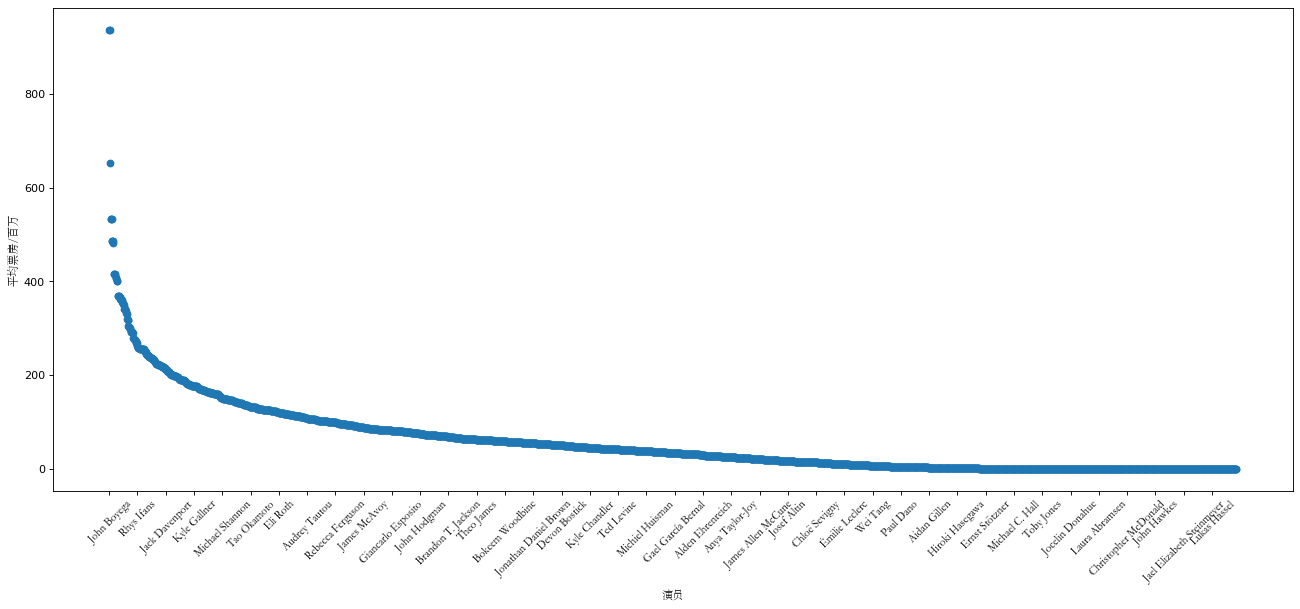

In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, font_manager

file_path = "IMDB-Movie-Data.csv"
df = pd.read_csv(file_path)

# 获取演员的人数
temp_actors_list = df["Actors"].str.split(",").tolist()  # 二维列表
print(temp_actors_list)
actors_list = [i for j in temp_actors_list for i in j]  # 二维展为一维
print(actors_list)
actors_num = len(set(actors_list))
actors_list_unique = list(set(actors_list))
print(actors_num)

# 因演员数据的特殊性，做如下预处理
# 构造全为0的数组，行是原来的样本数，列是演员（去重后的），参考one-hot编码思想
zeros_df = pd.DataFrame(np.zeros((df.shape[0], actors_num)), columns=actors_list_unique)
# print(zeros_df)

# 给每个电影出现某演员的位置赋值Revenue (Millions)
for i in range(df.shape[0]):
    zeros_df.loc[i, temp_actors_list[i]] = df["Revenue (Millions)"][i]

print(zeros_df.head(3))

# 统计每位演员所参演电影的平均票房
revenue_sum = zeros_df.sum(axis=0)
print(revenue_sum)
# print(revenue_sum.sort_values())
print("*"*50)

actor_movie_num = (zeros_df[actors_list_unique] != 0).sum()  # 默认按列求和
print(actor_movie_num.sort_values())
print(actor_movie_num)

revenue_mean = (revenue_sum / actor_movie_num).sort_values(ascending=False)
print(revenue_mean)

# 选择图形，散点图
# 准备数据
_x = revenue_mean.index.tolist()
_y = revenue_mean.values

# 设置图形大小
plt.figure( figsize=(20, 8), dpi=80 )
# 使用scatter绘制散点图
plt.scatter( _x, _y)

my_font = font_manager.FontProperties( fname='C:\Windows\Fonts\STSONG.TTF', size=10 )

_xticks_labels = [i for i in _x]
plt.xticks( _x[::60], _xticks_labels[::60], fontproperties=my_font,rotation=45)

plt.xlabel( '演员', fontproperties=my_font )
plt.ylabel( '平均票房/百万', fontproperties=my_font )

plt.show()

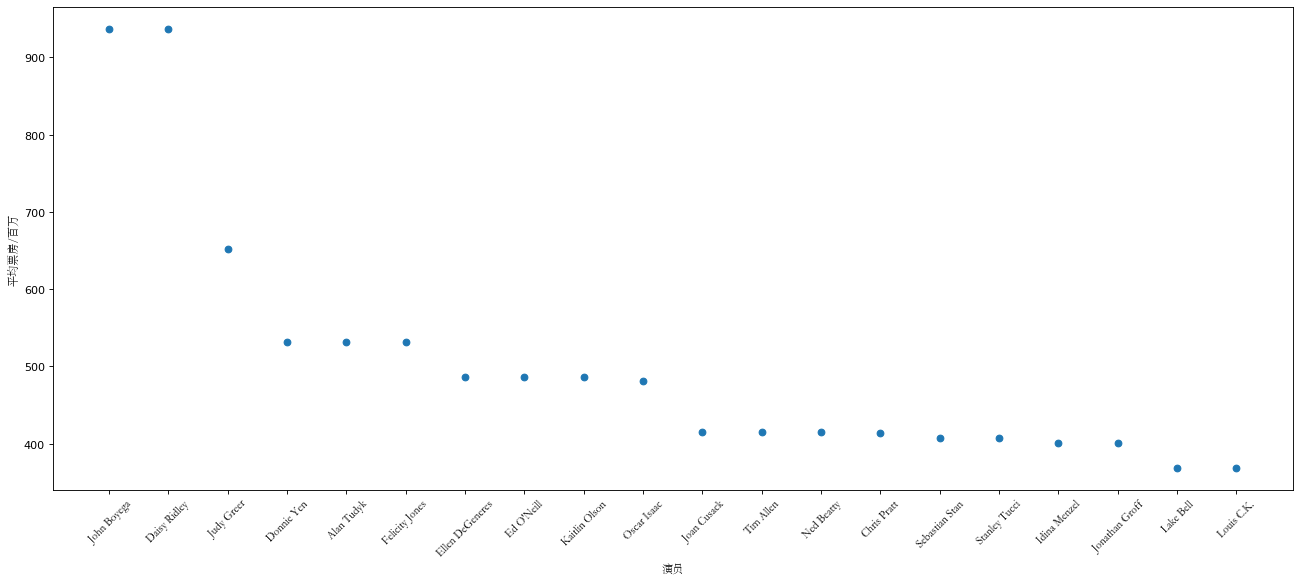

In [42]:
# 仅展示top20数据
plt.figure( figsize=(20, 8), dpi=80 )
plt.scatter(_x[0:20], _y[0:20])

plt.xticks( _x[0:20], fontproperties=my_font,rotation=45)

plt.xlabel( '演员', fontproperties=my_font )
plt.ylabel( '平均票房/百万', fontproperties=my_font )

plt.show()

3.票房与电影题材的关系（横轴题材，纵轴票房总额/平均值）

4.评分与票房的关系（散点图：两组数值）

5.时长与票房的关系（散点图：两组数值）

# 9 Pandas分组与聚合

In [35]:
import pandas as pd
import numpy as np
dict_obj = {'key1' : ['a', 'b', 'a', 'b',
                      'a', 'b', 'a', 'a'],
            'key2' : ['one', 'one', 'two', 'three',
                      'two', 'two', 'one', 'three'],
            'data1': np.random.randn(8),
            'data2': np.random.randn(8)}
df_obj = pd.DataFrame(dict_obj)

print(df_obj)

# dataframe根据key1进行分组，分组后的对象类型
print(df_obj.groupby('key1'))
print(type(df_obj.groupby('key1')))
print('-'*50)
print(df_obj['data1'])
# dataframe的 data1 列根据 key1 进行分组
print(type(df_obj['data1'].groupby(df_obj['key1'])))

# 分组运算
grouped1 = df_obj.groupby('key1')
print(grouped1.mean())

grouped2 = df_obj['data1'].groupby(df_obj['key1'])
print(grouped2.mean())


  key1   key2     data1     data2
0    a    one  0.241580 -1.345097
1    b    one  1.019846  1.351051
2    a    two -0.643605  0.184093
3    b  three -0.588190  2.320644
4    a    two -1.298028  0.278463
5    b    two -1.446970  0.498766
6    a    one  0.895290 -0.029943
7    a  three -0.989878 -0.362506
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
--------------------------------------------------
0    0.241580
1    1.019846
2   -0.643605
3   -0.588190
4   -1.298028
5   -1.446970
6    0.895290
7   -0.989878
Name: data1, dtype: float64
<class 'pandas.core.groupby.generic.SeriesGroupBy'>
         data1     data2
key1                    
a    -0.358928 -0.254998
b    -0.338438  1.390154
key1
a   -0.358928
b   -0.338438
Name: data1, dtype: float64


### 3. 按自定义的key分组

In [41]:
# 按自定义key分组，列表
self_def_key = [0, 1, 2, 3, 3, 3, 5, 7]
print(df_obj)
print(df_obj.groupby(self_def_key).size())  # 等于mysql的count
print(df_obj.groupby(self_def_key).sum())
# 按自定义key分组，多层列表
print(df_obj.groupby([df_obj['key1'], df_obj['key2']]).size())

# 按多个列多层分组
print('-'*50)
grouped2 = df_obj.groupby(['key1', 'key2'])
print(grouped2)
print(grouped2.size())

# 多层分组按key的顺序进行
print('-'*50)
grouped3 = df_obj.groupby(['key2', 'key1'])
print(grouped3.size())
print(grouped3.mean())
# unstack可以将多层索引的结果转换成单层的dataframe
print(grouped3.mean().index)
print(grouped3.mean().unstack())  # 竖变横
print(grouped3.mean().unstack().columns)
print("*"*50)
# 多层分组，根据key1 和 key2，做个性化处理
for group_name, group_data in grouped3:
    print(group_name)
    print(group_data)
    print(type(group_data))

  key1   key2     data1     data2
0    a    one  0.241580 -1.345097
1    b    one  1.019846  1.351051
2    a    two -0.643605  0.184093
3    b  three -0.588190  2.320644
4    a    two -1.298028  0.278463
5    b    two -1.446970  0.498766
6    a    one  0.895290 -0.029943
7    a  three -0.989878 -0.362506
0    1
1    1
2    1
3    3
5    1
7    1
dtype: int64
      data1     data2
0  0.241580 -1.345097
1  1.019846  1.351051
2 -0.643605  0.184093
3 -3.333188  3.097873
5  0.895290 -0.029943
7 -0.989878 -0.362506
key1  key2 
a     one      2
      three    1
      two      2
b     one      1
      three    1
      two      1
dtype: int64
--------------------------------------------------
key1  key2 
a     one      2
      three    1
      two      2
b     one      1
      three    1
      two      1
dtype: int64
--------------------------------------------------
key2   key1
one    a       2
       b       1
three  a       1
       b       1
two    a       2
       b       1
dtype: int64
  

In [42]:
list(grouped3)

[(('one', 'a'),
    key1 key2    data1     data2
  0    a  one  0.24158 -1.345097
  6    a  one  0.89529 -0.029943),
 (('one', 'b'),
    key1 key2     data1     data2
  1    b  one  1.019846  1.351051),
 (('three', 'a'),
    key1   key2     data1     data2
  7    a  three -0.989878 -0.362506),
 (('three', 'b'),
    key1   key2    data1     data2
  3    b  three -0.58819  2.320644),
 (('two', 'a'),
    key1 key2     data1     data2
  2    a  two -0.643605  0.184093
  4    a  two -1.298028  0.278463),
 (('two', 'b'),
    key1 key2    data1     data2
  5    b  two -1.44697  0.498766)]

# 按类型分组

In [ ]:
print(df_obj.dtypes)

In [45]:
# 一列数据类型必须一致，因为现实生活中一个特征类型是一致的
df_obj['data3']=df_obj['data2']+1
print(df_obj)
print(df_obj.groupby(df_obj.dtypes, axis=1).size()) # 按轴0没有意义
print(df_obj.groupby(df_obj.dtypes, axis=1).sum())
self_column_key=[1,2,3,3,4]
print(df_obj.groupby(self_column_key, axis=1).sum())   # 通过自定义索引去让不同列相加

  key1   key2     data1     data2     data3
0    a    one  0.241580 -1.345097 -0.345097
1    b    one  1.019846  1.351051  2.351051
2    a    two -0.643605  0.184093  1.184093
3    b  three -0.588190  2.320644  3.320644
4    a    two -1.298028  0.278463  1.278463
5    b    two -1.446970  0.498766  1.498766
6    a    one  0.895290 -0.029943  0.970057
7    a  three -0.989878 -0.362506  0.637494
float64    3
object     2
dtype: int64
    float64  object
0 -1.448614    aone
1  4.721949    bone
2  0.724581    atwo
3  5.053098  bthree
4  0.258898    atwo
5  0.550561    btwo
6  1.835404    aone
7 -0.714890  athree
   1      2         3         4
0  a    one -1.103517 -0.345097
1  b    one  2.370898  2.351051
2  a    two -0.459512  1.184093
3  b  three  1.732454  3.320644
4  a    two -1.019565  1.278463
5  b    two -0.948204  1.498766
6  a    one  0.865347  0.970057
7  a  three -1.352384  0.637494


### 2. 通过字典分组

In [46]:
df_obj2 = pd.DataFrame(np.random.randint(1, 10, (5,5)),
                       columns=['a', 'b', 'c', 'd', 'e'],
                       index=['A', 'B', 'C', 'D', 'E'])
# 给指定某个部分的数据重新赋值为 np.NaN
df_obj2.loc['B','b':'d']=np.NAN

print(df_obj2)
# 通过字典分组
mapping_dict = {'a':'Python', 'b':'Python', 'c':'Java', 'd':'C', 'e':'Java'}
print(df_obj2.groupby(mapping_dict, axis=1).size())
print(df_obj2.groupby(mapping_dict, axis=1).count()) # 非NaN的个数
print(df_obj2.groupby(mapping_dict, axis=1).sum())  #求和不记录nan,nan当为0


   a    b    c    d  e
A  1  1.0  8.0  1.0  7
B  4  NaN  NaN  NaN  9
C  3  9.0  7.0  6.0  6
D  6  1.0  5.0  9.0  6
E  4  7.0  6.0  6.0  1
C         1
Java      2
Python    2
dtype: int64
   C  Java  Python
A  1     2       2
B  0     1       1
C  1     2       2
D  1     2       2
E  1     2       2
     C  Java  Python
A  1.0  15.0     2.0
B  0.0   9.0     4.0
C  6.0  13.0    12.0
D  9.0  11.0     7.0
E  6.0   7.0    11.0


In [47]:
str1='熊大'

In [48]:
str1[0]

'熊'

In [52]:
# 通过函数分组
df_obj3 = pd.DataFrame(np.random.randint(1, 10, (5,5)),
                       columns=['a', 'b', 'c', 'd', 'ee'],
                       index=['AA', 'BBBB', 'CC', 'D', 'EE'])
#df_obj3

def group_key(idx):
    """
        idx 为列索引或行索引，默认为行索引
    """
    #return idx
    return len(idx)
print(df_obj3)
print(df_obj3.groupby(group_key,axis=1).size())
print("*"*50)
# 以上自定义函数默认情况下等价于
df_obj3.groupby(len).size()


      a  b  c  d  ee
AA    5  8  4  1   3
BBBB  6  2  5  5   5
CC    4  8  4  6   8
D     4  4  2  6   9
EE    9  3  2  5   9
1    4
2    1
dtype: int64
**************************************************


1    1
2    3
4    1
dtype: int64

In [53]:
# 通过索引级别分组
columns = pd.MultiIndex.from_arrays([['Python', 'Java', 'Python', 'Java', 'Python'],
                                     ['A', 'A', 'B', 'C', 'B']],
                                    names=['language', 'index1'])
df_obj4 = pd.DataFrame(np.random.randint(1, 10, (5, 5)), columns=columns)
print(df_obj4)

# 根据language进行分组
print(df_obj4.groupby(level='language', axis=1).sum())
# 根据index进行分组
print(df_obj4.groupby(level='index1', axis=1).sum())


language Python Java Python Java Python
index1        A    A      B    C      B
0             8    9      8    5      9
1             1    5      2    1      8
2             1    2      3    3      3
3             4    8      6    4      6
4             7    5      2    4      6
language  Java  Python
0           14      25
1            6      11
2            5       7
3           12      16
4            9      15
index1   A   B  C
0       17  17  5
1        6  10  1
2        3   6  3
3       12  12  4
4       12   8  4


## 聚合


In [56]:
dict_obj = {'key1' : ['a', 'b', 'a', 'b',
                      'a', 'b', 'a', 'a'],
            'key2' : ['one', 'one', 'two', 'three',
                      'two', 'two', 'one', 'three'],
            'data1': np.random.randint(1,10, 8),
            'data2': np.random.randint(1,10, 8)}
df_obj = pd.DataFrame(dict_obj)
print(df_obj)

print(df_obj.groupby("key1").sum())
print(df_obj.groupby("key1").max())
print(df_obj.groupby("key1").min())
print('-'*50)
#平均值
print(df_obj.groupby("key1").mean())
print('-'*50)
print(df_obj.groupby("key1").describe())

  key1   key2  data1  data2
0    a    one      8      1
1    b    one      4      2
2    a    two      1      9
3    b  three      4      7
4    a    two      8      1
5    b    two      2      3
6    a    one      9      6
7    a  three      7      5
      data1  data2
key1              
a        33     22
b        10     12
     key2  data1  data2
key1                   
a     two      9      9
b     two      4      7
     key2  data1  data2
key1                   
a     one      1      1
b     one      2      2
--------------------------------------------------
         data1  data2
key1                 
a     6.600000    4.4
b     3.333333    4.0
--------------------------------------------------
     data1                                              data2                 \
     count      mean       std  min  25%  50%  75%  max count mean       std   
key1                                                                           
a      5.0  6.600000  3.209361  1.0  7.0  8.0  8.0

In [59]:

df_obj5 = pd.DataFrame(dict_obj)
print(df_obj5)
# 自定义聚合函数
def peak_range(df):
    """
        返回数值范围,df参数是groupby后的groupby对象
    """
    # 参数df为索引所对应的记录；计算极差
    return df.max() - df.min()

print(df_obj5.loc[:,['key1','data1','data2']].groupby('key1').agg(peak_range))
print(df_obj5.loc[:,['key1','data1','data2']].groupby('key1').agg(lambda df : df.max() - df.min()))  # 以上：等价于该匿名函数

  key1   key2  data1  data2
0    a    one      8      1
1    b    one      4      2
2    a    two      1      9
3    b  three      4      7
4    a    two      8      1
5    b    two      2      3
6    a    one      9      6
7    a  three      7      5
      data1  data2
key1              
a         8      8
b         2      5
      data1  data2
key1              
a         8      8
b         2      5


In [60]:
# 同时应用多个聚合函数
print(df_obj.groupby('key1').agg(['mean', 'std', 'count', peak_range]))

         data1                            data2                           
          mean       std count peak_range  mean       std count peak_range
key1                                                                      
a     6.600000  3.209361     5          8   4.4  3.435113     5          8
b     3.333333  1.154701     3          2   4.0  2.645751     3          5


C:\Users\waitp\AppData\Local\Temp\ipykernel_20604\3406391583.py:2: FutureWarning: ['key2'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(df_obj.groupby('key1').agg(['mean', 'std', 'count', peak_range]))


In [61]:
# 每列作用不同的聚合函数（利用字典实现）
dict_mapping = {'data1':'mean',
                'data2':'count'}
print(df_obj.groupby('key1').agg(dict_mapping))

         data1  data2
key1                 
a     6.600000      5
b     3.333333      3


# 设置索引

In [3]:
#索引中单项不可变，但是整体可以换掉
a = pd.DataFrame({'a': range(7),'b': range(7, 0, -1),
                  'c': ['one','one','one','two','two','two', 'two'],
                  'd': list("hjklmno")})
a

,a,b,c,d
0,0,7,one,h
1,1,6,one,j
2,2,5,one,k
3,3,4,two,l
4,4,3,two,m
5,5,2,two,n
6,6,1,two,o


In [4]:
c=a.copy()
a.index=list('abcdefg')  #a的索引变了，a.index更换索引
print(c)
print(a)
print('-'*50)
b=c.reindex(list('abcdefg'))  #返回一个新的df，索引是设置了c的索引后，c索引不变,b是没有值
print(c)
b  # 体会reindex作用

   a  b    c  d
0  0  7  one  h
1  1  6  one  j
2  2  5  one  k
3  3  4  two  l
4  4  3  two  m
5  5  2  two  n
6  6  1  two  o
   a  b    c  d
a  0  7  one  h
b  1  6  one  j
c  2  5  one  k
d  3  4  two  l
e  4  3  two  m
f  5  2  two  n
g  6  1  two  o
--------------------------------------------------
   a  b    c  d
0  0  7  one  h
1  1  6  one  j
2  2  5  one  k
3  3  4  two  l
4  4  3  two  m
5  5  2  two  n
6  6  1  two  o


,a,b,c,d
a,NaN,NaN,NaN,NaN
b,NaN,NaN,NaN,NaN
c,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN
f,NaN,NaN,NaN,NaN
g,NaN,NaN,NaN,NaN


In [5]:
#让某些列变为索引，让c列，d列数据变为索引 接口set_index
print(a)
print(a.set_index(['c','d']))#a没变，返回修改后的df
a

   a  b    c  d
a  0  7  one  h
b  1  6  one  j
c  2  5  one  k
d  3  4  two  l
e  4  3  two  m
f  5  2  two  n
g  6  1  two  o
       a  b
c   d      
one h  0  7
    j  1  6
    k  2  5
two l  3  4
    m  4  3
    n  5  2
    o  6  1


,a,b,c,d
a,0,7,one,h
b,1,6,one,j
c,2,5,one,k
d,3,4,two,l
e,4,3,two,m
f,5,2,two,n
g,6,1,two,o


### 时间序列

In [6]:
pd.date_range(start="20190101", end="20190924")

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-09-15', '2019-09-16', '2019-09-17', '2019-09-18',
               '2019-09-19', '2019-09-20', '2019-09-21', '2019-09-22',
               '2019-09-23', '2019-09-24'],
              dtype='datetime64[ns]', length=267, freq='D')

In [7]:
pd.date_range(start="20210712",periods=10,freq='B')  # business day

DatetimeIndex(['2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15',
               '2021-07-16', '2021-07-19', '2021-07-20', '2021-07-21',
               '2021-07-22', '2021-07-23'],
              dtype='datetime64[ns]', freq='B')

In [8]:
pd.date_range(start="20190101",periods=10,freq='M')  # 默认是月末

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31'],
              dtype='datetime64[ns]', freq='M')

In [9]:
pd.date_range(start="20190101",periods=10,freq='MS')

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [10]:
pd.date_range(start="20210421",periods=10,freq='W')  #拿每周的周日生成

DatetimeIndex(['2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16',
               '2021-05-23', '2021-05-30', '2021-06-06', '2021-06-13',
               '2021-06-20', '2021-06-27'],
              dtype='datetime64[ns]', freq='W-SUN')

In [11]:
s = pd.Series(['3/11/2000', '3/12/2000', '3/13/2000'] * 1000)
s

0       3/11/2000
1       3/12/2000
2       3/13/2000
3       3/11/2000
4       3/12/2000
          ...    
2995    3/12/2000
2996    3/13/2000
2997    3/11/2000
2998    3/12/2000
2999    3/13/2000
Length: 3000, dtype: object

In [12]:
#timeit可以统计执行耗时，to_datetime把字符串转为时间格式
%timeit pd.to_datetime(s, infer_datetime_format=True)

962 µs ± 19.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### 分组运算

In [27]:
dict_obj = {'key1' : ['a', 'b', 'a', 'b',
                      'a', 'b', 'a', 'a'],
            'key2' : ['one', 'one', 'two', 'three',
                      'two', 'two', 'one', 'three'],
            'data1': np.random.randint(1, 10, 8),
            'data2': np.random.randint(1, 10, 8)}
df_obj = pd.DataFrame(dict_obj)
print(df_obj)

# 按key1分组后，计算data1，data2的统计信息并附加到原始表格中，并添加表头前缀
k1_sum = df_obj.groupby('key1').sum().add_prefix('sum_')
print(k1_sum)

  key1   key2  data1  data2
0    a    one      8      9
1    b    one      1      1
2    a    two      8      7
3    b  three      8      7
4    a    two      8      5
5    b    two      8      2
6    a    one      5      1
7    a  three      2      8
      sum_data1  sum_data2
key1                      
a            31         30
b            17         10


In [14]:
df_obj

,key1,key2,data1,data2
0,a,one,5,3
1,b,one,2,8
2,a,two,9,7
3,b,three,6,1
4,a,two,6,1
5,b,two,9,8
6,a,one,5,7
7,a,three,8,1


In [15]:
k1_sum

,sum_data1,sum_data2
key1,,
a,33,19
b,17,17


In [16]:
# 两个df之间进行连接（这个与day56有些重复，这里没有后面写的清楚）
# 和 mysql的join是一致的，on 连接条件
k1_sum_merge = pd.merge(df_obj, k1_sum, left_on='key1', right_index=True)
k1_sum_merge

,key1,key2,data1,data2,sum_data1,sum_data2
0,a,one,5,3,33,19
2,a,two,9,7,33,19
4,a,two,6,1,33,19
6,a,one,5,7,33,19
7,a,three,8,1,33,19
1,b,one,2,8,17,17
3,b,three,6,1,17,17
5,b,two,9,8,17,17


In [24]:
# 方法2，使用transform：计算结果和原始数据的形状保持一致（主要是样本数一致，特征数不一定）
k1_sum_tf = df_obj.groupby('key1').transform(np.sum).add_prefix('sum_')
k1_sum_tf
# df_obj[k1_sum_tf.columns] = k1_sum_tf
# print(df_obj)

,sum_key2,sum_data1,sum_data2,sum_sum_key2,sum_sum_data1,sum_sum_data2
0,onetwotwoonethree,33,19,onetwotwoonethreeonetwotwoonethreeonetwotwoone...,165,95
1,onethreetwo,17,17,onethreetwoonethreetwoonethreetwo,51,51
2,onetwotwoonethree,33,19,onetwotwoonethreeonetwotwoonethreeonetwotwoone...,165,95
3,onethreetwo,17,17,onethreetwoonethreetwoonethreetwo,51,51
4,onetwotwoonethree,33,19,onetwotwoonethreeonetwotwoonethreeonetwotwoone...,165,95
5,onethreetwo,17,17,onethreetwoonethreetwoonethreetwo,51,51
6,onetwotwoonethree,33,19,onetwotwoonethreeonetwotwoonethreeonetwotwoone...,165,95
7,onetwotwoonethree,33,19,onetwotwoonethreeonetwotwoonethreeonetwotwoone...,165,95


In [28]:
df_obj.groupby('key1').mean()

,data1,data2
key1,,
a,6.200000,6.000000
b,5.666667,3.333333


In [29]:
df_obj

,key1,key2,data1,data2
0,a,one,8,9
1,b,one,1,1
2,a,two,8,7
3,b,three,8,7
4,a,two,8,5
5,b,two,8,2
6,a,one,5,1
7,a,three,2,8


In [30]:
df_obj.groupby('key1').transform(np.mean)  # key2列字符串可以sum但不可以mean

C:\Users\waitp\AppData\Local\Temp\ipykernel_24116\2311966706.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df_obj.groupby('key1').transform(np.mean)


,data1,data2
0,6.200000,6.000000
1,5.666667,3.333333
2,6.200000,6.000000
3,5.666667,3.333333
4,6.200000,6.000000
5,5.666667,3.333333
6,6.200000,6.000000
7,6.200000,6.000000


In [31]:
def diff_mean(s):
    """
        返回数据与均值的差值
    """
    return s - s.mean()

print(df_obj.groupby('key1').transform(diff_mean))  # 可以将transform理解为定型

      data1     data2
0  1.800000  3.000000
1 -4.666667 -2.333333
2  1.800000  1.000000
3  2.333333  3.666667
4  1.800000 -1.000000
5  2.333333 -1.333333
6 -1.200000 -5.000000
7 -4.200000  2.000000


C:\Users\waitp\AppData\Local\Temp\ipykernel_24116\3149826509.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  print(df_obj.groupby('key1').transform(diff_mean))


In [32]:
# df_obj.groupby('key1')
